In [1]:
## Download dataset
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv

--2019-12-14 13:03:31--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.16.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.16.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519 [text/plain]
Saving to: ‘shampoo.csv’

shampoo.csv         100%[===================>]     519  --.-KB/s    in 0s      

2019-12-14 13:03:32 (33,6 MB/s) - ‘shampoo.csv’ saved [519/519]



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

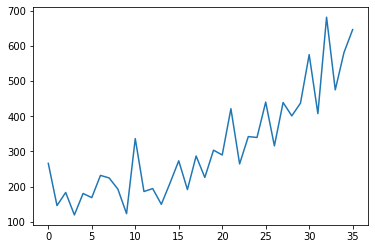

In [5]:
data = pd.read_csv("shampoo.csv")
plt.plot(data['Sales'])

In [27]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torch

## 1. Apply moving average

<img src="conv1d.gif" width="400">
Source: https://blog.floydhub.com/reading-minds-with-deep-learning/

In [7]:
ts = data.Sales
ts_tensor = torch.Tensor(ts).reshape(1, 1, -1)

In [8]:
kernel = [0.5, 0.5]
kernel_tensor = torch.Tensor(kernel).reshape(1, 1, -1)

In [9]:
F.conv1d(ts_tensor, kernel_tensor)

tensor([[[205.9500, 164.5000, 151.2000, 149.8000, 174.4000, 200.1500, 228.1500,
          208.6500, 157.8500, 229.7000, 261.2000, 190.1000, 171.9000, 179.8000,
          241.7000, 232.3500, 239.2000, 256.5000, 264.8000, 296.7500, 355.7500,
          343.0500, 303.4000, 341.0000, 390.0500, 378.1500, 377.6000, 420.3000,
          419.3500, 506.4500, 491.5500, 544.8000, 578.6500, 528.3000, 614.1000]]])

In [10]:
ts.rolling(2).mean()

0        NaN
1     205.95
2     164.50
3     151.20
4     149.80
5     174.40
6     200.15
7     228.15
8     208.65
9     157.85
10    229.70
11    261.20
12    190.10
13    171.90
14    179.80
15    241.70
16    232.35
17    239.20
18    256.50
19    264.80
20    296.75
21    355.75
22    343.05
23    303.40
24    341.00
25    390.05
26    378.15
27    377.60
28    420.30
29    419.35
30    506.45
31    491.55
32    544.80
33    578.65
34    528.30
35    614.10
Name: Sales, dtype: float64

## 2. Learning a network, which computes moving average

In [16]:
X = data.Sales
X_tensor = torch.Tensor(X).reshape(1,1,-1)

y = data.Sales.rolling(5).mean()
y = y[4:, ].to_numpy()
y_tensor = torch.Tensor(y).reshape(1,1,-1)
y_tensor

tensor([[[178.9200, 159.4200, 176.6000, 184.8800, 199.5800, 188.1000, 221.7000,
          212.5200, 206.4800, 197.8200, 215.2600, 202.6200, 203.7200, 222.2600,
          237.5600, 256.2600, 259.5800, 305.6200, 301.1200, 324.3800, 331.6000,
          361.7000, 340.5600, 375.5200, 387.3200, 406.8600, 433.8800, 452.2200,
          500.7600, 515.5600, 544.3400, 558.6200]]])

In [87]:
# Building a network
net = nn.Conv1d(1, 1, 5, padding_mode="valid")

In [88]:
# Initial values
net.weight.data.numpy()

array([[[ 0.25895965, -0.00114489,  0.01369303, -0.27942085,
          0.12607741]]], dtype=float32)

In [89]:
net(X_tensor)

tensor([[[ 60.6557,  10.1060,  31.9255,  -3.4353,  11.2847,   8.1014,  70.5294,
          -10.9534,  26.9823,  -1.4211,  74.3385,  25.7513,   0.8225,  24.9547,
            5.0505,  49.6478,   4.0840,  50.4054, -22.2741,  53.3461,  25.4297,
           74.2023, -10.4392,  61.4355,  19.6707,  62.7496,  37.1717,   9.9087,
           83.4283, -12.4137,  98.4187,  30.4470]]],
       grad_fn=<SqueezeBackward1>)

In [94]:
# Training a network
loss = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

In [95]:
# Here, he have only one example so it does not make sense to divide training into epochs

In [99]:
running_loss = 0.0
for iteration in range(1000):
    optimizer.zero_grad()
    
    outputs = net(X_tensor)  
    # print(outputs)
    
    loss_value = torch.mean((outputs - y_tensor)**2)
    loss_value.backward()
    optimizer.step()
    
    running_loss += loss_value.item()
    
    print('[%d] loss: %.3f' % (iteration, loss_value.item()))
    
    print(net.weight.data.numpy())
    

[0] loss: 263.358
[[[0.3652763  0.24271394 0.1460073  0.01332371 0.2523629 ]]]
[1] loss: 258.985
[[[0.3644006  0.24322207 0.14557678 0.01450832 0.25173065]]]
[2] loss: 254.656
[[[0.36351252 0.24370828 0.14513707 0.01567283 0.25108588]]]
[3] loss: 250.388
[[[0.36261728 0.24417758 0.1446934  0.01682212 0.25043383]]]
[4] loss: 246.198
[[[0.36172035 0.24463522 0.14425123 0.01796133 0.24977997]]]
[5] loss: 242.098
[[[0.36082706 0.24508633 0.14381586 0.01909542 0.24912961]]]
[6] loss: 238.093
[[[0.35994226 0.24553554 0.14339213 0.02022892 0.24848758]]]
[7] loss: 234.180
[[[0.35907    0.24598674 0.14298409 0.02136561 0.24785794]]]
[8] loss: 230.353
[[[0.35821337 0.24644288 0.14259478 0.02250832 0.24724378]]]
[9] loss: 226.599
[[[0.3573743  0.24690579 0.14222616 0.02365881 0.24664702]]]
[10] loss: 222.908
[[[0.3565536  0.24737617 0.14187898 0.02481774 0.24606846]]]
[11] loss: 219.271
[[[0.35575098 0.24785367 0.14155291 0.02598471 0.24550779]]]
[12] loss: 215.687
[[[0.35496506 0.24833693 0.1412

[147] loss: 38.240
[[[0.278984   0.25780106 0.1454005  0.12844682 0.20083694]]]
[148] loss: 37.846
[[[0.27860212 0.25762194 0.14563407 0.12887296 0.2006952 ]]]
[149] loss: 37.457
[[[0.27822196 0.2574415  0.14586852 0.12929603 0.20055532]]]
[150] loss: 37.071
[[[0.27784353 0.25725973 0.14610381 0.12971608 0.20041728]]]
[151] loss: 36.690
[[[0.2774668  0.25707668 0.14633992 0.13013314 0.20028107]]]
[152] loss: 36.312
[[[0.27709177 0.2568924  0.14657682 0.13054723 0.20014666]]]
[153] loss: 35.938
[[[0.2767184  0.25670695 0.14681447 0.13095838 0.20001405]]]
[154] loss: 35.568
[[[0.2763467  0.25652033 0.14705282 0.13136664 0.19988324]]]
[155] loss: 35.202
[[[0.27597666 0.25633258 0.14729187 0.13177204 0.19975418]]]
[156] loss: 34.840
[[[0.27560824 0.25614375 0.14753155 0.1321746  0.19962686]]]
[157] loss: 34.481
[[[0.27524143 0.25595388 0.14777185 0.13257435 0.19950126]]]
[158] loss: 34.125
[[[0.27487624 0.25576296 0.14801273 0.13297132 0.19937737]]]
[159] loss: 33.774
[[[0.27451262 0.25557

[277] loss: 9.158
[[[0.24011832 0.23225461 0.17480505 0.1663432  0.19291115]]]
[278] loss: 9.049
[[[0.23988707 0.23208174 0.17498668 0.1665411  0.1929023 ]]]
[279] loss: 8.942
[[[0.23965675 0.23190953 0.17516738 0.16673799 0.1928939 ]]]
[280] loss: 8.835
[[[0.23942733 0.23173796 0.17534718 0.16693386 0.19288598]]]
[281] loss: 8.730
[[[0.23919882 0.23156704 0.17552605 0.16712874 0.19287851]]]
[282] loss: 8.626
[[[0.23897122 0.23139678 0.17570402 0.16732262 0.1928715 ]]]
[283] loss: 8.523
[[[0.23874453 0.23122716 0.17588106 0.1675155  0.19286491]]]
[284] loss: 8.421
[[[0.23851874 0.2310582  0.17605719 0.16770738 0.19285877]]]
[285] loss: 8.320
[[[0.23829387 0.23088989 0.1762324  0.16789828 0.19285306]]]
[286] loss: 8.220
[[[0.2380699  0.23072223 0.1764067  0.16808821 0.19284779]]]
[287] loss: 8.122
[[[0.23784684 0.23055524 0.17658009 0.16827716 0.19284293]]]
[288] loss: 8.024
[[[0.23762468 0.2303889  0.17675255 0.16846514 0.19283849]]]
[289] loss: 7.927
[[[0.23740342 0.23022321 0.1769241

[404] loss: 1.783
[[[0.21765047 0.21535182 0.1910882  0.184765   0.19414407]]]
[405] loss: 1.758
[[[0.21752453 0.21525551 0.1911693  0.18486564 0.1941641 ]]]
[406] loss: 1.734
[[[0.2173993  0.2151597  0.1912498  0.18496571 0.19418418]]]
[407] loss: 1.710
[[[0.21727477 0.21506438 0.1913297  0.18506522 0.19420432]]]
[408] loss: 1.687
[[[0.21715094 0.21496955 0.191409   0.18516417 0.1942245 ]]]
[409] loss: 1.664
[[[0.21702781 0.2148752  0.19148771 0.18526255 0.19424474]]]
[410] loss: 1.641
[[[0.21690539 0.21478136 0.19156583 0.18536036 0.19426504]]]
[411] loss: 1.618
[[[0.21678366 0.214688   0.19164336 0.18545762 0.19428538]]]
[412] loss: 1.596
[[[0.21666263 0.21459514 0.1917203  0.18555433 0.19430576]]]
[413] loss: 1.574
[[[0.2165423  0.21450275 0.19179668 0.18565048 0.19432619]]]
[414] loss: 1.552
[[[0.21642268 0.21441086 0.19187246 0.18574609 0.19434667]]]
[415] loss: 1.530
[[[0.21630374 0.21431944 0.19194768 0.18584116 0.19436719]]]
[416] loss: 1.509
[[[0.21618548 0.21422851 0.1920223

[[[0.20507203 0.20525897 0.1982601  0.19499624 0.19723251]]]
[561] loss: 0.174
[[[0.2050273  0.20521973 0.19828087 0.19503446 0.19724903]]]
[562] loss: 0.171
[[[0.2049829  0.20518073 0.19830143 0.19507241 0.19726548]]]
[563] loss: 0.169
[[[0.20493884 0.20514199 0.19832179 0.19511011 0.19728187]]]
[564] loss: 0.166
[[[0.20489511 0.20510349 0.19834194 0.19514756 0.19729818]]]
[565] loss: 0.163
[[[0.2048517  0.20506524 0.19836187 0.19518475 0.19731444]]]
[566] loss: 0.161
[[[0.20480862 0.20502722 0.19838162 0.19522169 0.19733064]]]
[567] loss: 0.158
[[[0.20476587 0.20498945 0.19840115 0.19525838 0.19734678]]]
[568] loss: 0.156
[[[0.20472345 0.20495193 0.1984205  0.19529481 0.19736286]]]
[569] loss: 0.153
[[[0.20468135 0.20491464 0.19843964 0.195331   0.19737886]]]
[570] loss: 0.151
[[[0.20463957 0.2048776  0.1984586  0.19536695 0.1973948 ]]]
[571] loss: 0.149
[[[0.2045981  0.2048408  0.19847736 0.19540265 0.19741069]]]
[572] loss: 0.146
[[[0.20455696 0.20480421 0.19849592 0.19543812 0.197

[665] loss: 0.032
[[[0.20186238 0.20227861 0.19957426 0.19784547 0.1986221 ]]]
[666] loss: 0.032
[[[0.2018432  0.20225935 0.19958065 0.19786347 0.1986321 ]]]
[667] loss: 0.031
[[[0.20182419 0.20224023 0.19958696 0.19788134 0.19864206]]]
[668] loss: 0.031
[[[0.20180534 0.20222124 0.19959319 0.19789907 0.19865195]]]
[669] loss: 0.030
[[[0.20178665 0.2022024  0.19959934 0.19791667 0.19866179]]]
[670] loss: 0.030
[[[0.20176812 0.20218368 0.19960542 0.19793414 0.19867156]]]
[671] loss: 0.029
[[[0.20174974 0.2021651  0.19961141 0.19795147 0.1986813 ]]]
[672] loss: 0.029
[[[0.20173153 0.20214665 0.19961733 0.19796866 0.19869097]]]
[673] loss: 0.028
[[[0.20171347 0.20212834 0.19962317 0.19798572 0.19870058]]]
[674] loss: 0.028
[[[0.20169558 0.20211016 0.19962895 0.19800267 0.19871014]]]
[675] loss: 0.027
[[[0.20167783 0.20209211 0.19963466 0.19801947 0.19871965]]]
[676] loss: 0.027
[[[0.20166025 0.2020742  0.19964029 0.19803615 0.1987291 ]]]
[677] loss: 0.026
[[[0.20164281 0.20205642 0.1996458

[773] loss: 0.006
[[[0.20052415 0.20084783 0.19993901 0.19916151 0.19941528]]]
[774] loss: 0.006
[[[0.20051694 0.20083943 0.19994034 0.19916908 0.19942029]]]
[775] loss: 0.006
[[[0.2005098  0.2008311  0.19994165 0.1991766  0.19942527]]]
[776] loss: 0.005
[[[0.20050274 0.20082285 0.19994293 0.19918405 0.19943021]]]
[777] loss: 0.005
[[[0.20049573 0.20081465 0.1999442  0.19919144 0.19943513]]]
[778] loss: 0.005
[[[0.2004888  0.20080653 0.19994545 0.19919877 0.19944   ]]]
[779] loss: 0.005
[[[0.20048194 0.20079847 0.19994667 0.19920602 0.19944485]]]
[780] loss: 0.005
[[[0.20047513 0.20079048 0.19994788 0.19921322 0.19944964]]]
[781] loss: 0.005
[[[0.20046839 0.20078255 0.19994906 0.19922036 0.19945441]]]
[782] loss: 0.005
[[[0.20046172 0.20077468 0.19995022 0.19922744 0.19945915]]]
[783] loss: 0.005
[[[0.2004551  0.20076688 0.19995135 0.19923446 0.19946384]]]
[784] loss: 0.005
[[[0.20044854 0.20075914 0.19995247 0.19924141 0.19946851]]]
[785] loss: 0.005
[[[0.20044206 0.20075147 0.1999535

[887] loss: 0.002
[[[0.20002794 0.20023184 0.19999799 0.1997105  0.1998002 ]]]
[888] loss: 0.002
[[[0.20002565 0.20022872 0.19999804 0.19971325 0.19980225]]]
[889] loss: 0.002
[[[0.20002338 0.20022564 0.19999808 0.19971596 0.19980429]]]
[890] loss: 0.002
[[[0.20002113 0.20022257 0.19999811 0.19971864 0.1998063 ]]]
[891] loss: 0.002
[[[0.20001891 0.20021953 0.19999814 0.19972129 0.1998083 ]]]
[892] loss: 0.002
[[[0.2000167  0.20021652 0.19999817 0.19972391 0.19981028]]]
[893] loss: 0.002
[[[0.20001453 0.20021354 0.19999819 0.19972652 0.19981225]]]
[894] loss: 0.002
[[[0.20001239 0.20021059 0.1999982  0.1997291  0.1998142 ]]]
[895] loss: 0.002
[[[0.20001025 0.20020767 0.19999823 0.19973166 0.19981614]]]
[896] loss: 0.002
[[[0.20000815 0.20020477 0.19999826 0.19973421 0.19981806]]]
[897] loss: 0.002
[[[0.20000608 0.20020191 0.19999829 0.19973673 0.19981998]]]
[898] loss: 0.002
[[[0.20000403 0.20019908 0.1999983  0.19973923 0.19982187]]]
[899] loss: 0.002
[[[0.200002   0.20019628 0.1999983

[991] loss: 0.001
[[[0.1998846  0.20002538 0.19999214 0.1998908  0.19994073]]]
[992] loss: 0.001
[[[0.19988388 0.20002425 0.19999205 0.19989179 0.19994153]]]
[993] loss: 0.001
[[[0.19988318 0.20002313 0.19999196 0.19989277 0.19994232]]]
[994] loss: 0.001
[[[0.19988248 0.20002203 0.19999187 0.19989374 0.19994311]]]
[995] loss: 0.001
[[[0.19988179 0.20002094 0.19999178 0.1998947  0.19994389]]]
[996] loss: 0.001
[[[0.1998811  0.20001987 0.19999169 0.19989564 0.19994465]]]
[997] loss: 0.001
[[[0.19988044 0.2000188  0.1999916  0.19989657 0.1999454 ]]]
[998] loss: 0.001
[[[0.19987977 0.20001774 0.19999151 0.1998975  0.19994617]]]
[999] loss: 0.001
[[[0.19987911 0.20001669 0.19999142 0.19989842 0.19994691]]]


In [97]:
y_tensor.size()

torch.Size([1, 1, 32])

In [67]:
outputs.size()

torch.Size([1, 1, 32])

In [100]:
net.bias

Parameter containing:
tensor([0.0924], requires_grad=True)